In [5]:
%run -i settings.py

## $\mathrm{n^{++}}$-InAs

In [63]:
# experemental data
cap, volt = ecvproc.cv_read('./data/8-0-866_back-3@0.000.CV', model='Cp')
Diss, _ = ecvproc.cv_read('./data/8-0-866_back-3@0.000.CV', model='Diss')

# simulation results 
data = np.genfromtxt('./data/cap_volt_ion_2e+18.dat')
cc = -data[:,1]
vv = data[:,0]
# linear fitting
cap_fit, volt_fit, doping = ecvproc.lin_fit(cc, vv, 
                                            vmin=0.2, vmax=0.3 )

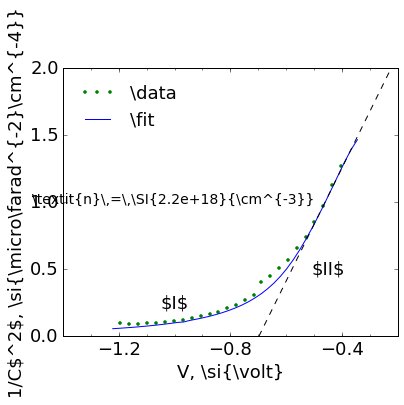

In [70]:
fig, cv = plt.subplots()
cv.plot(volt[::4], 1/cap[::4]**2, 'g.', label=r'\data')
cv.plot(vv-0.71, 1/cc**2, 'b', label=r'\fit')
cv.plot(volt_fit-0.71, cap_fit, 'k--')
cv.set_xlabel(r'V, \si{\volt}')
cv.set_ylabel(r'1/C\$^2$, \si{\micro\farad^{-2}\cm^{-4}}')

plt.legend(loc='best', frameon=False, numpoints = 3)

cv.text(-0.5, 0.99, 
        r'\textit{n}\,=\,\SI{'+'{:3.1e}'.format(-doping)+'}{\cm^{-3}}',
        fontsize=14, ha='right')

cv.xaxis.set_major_locator(ticker.MultipleLocator(0.4))
cv.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#plt.tight_layout()

cv.text(-1, 0.25, '\$I$', ha="center", va="center")
cv.text(-0.45, 0.5, '\$II$', ha="center", va="center")

# cv.annotate(
#     '', (-0.45, 1.5), (-0.2, 1.5),
#     arrowprops={'arrowstyle': '<-', 'color': 'r'})
# cv.annotate(
#     '', (-0.55, 0.7), (-0.9, 0.7),
#     arrowprops={'arrowstyle': '<-', 'color': 'k'})

# dis = cv.twinx()
# dis.plot(volt[::4], Diss[::4], 'r.')
# # dis.set_ylabel(r'\$\tg \delta$', color='r')
# dis.yaxis.set_label_coords(1.12, 0.75)
# # for tl in dis.get_yticklabels():
# #     tl.set_color('r')
# dis.set_ylim(-1.7, 1.7)
# dis.set_yticks([0, 0.5, 1, 1.5])
# dis.set_xlim(-1.7, 0)



name1 = 'IP_InAs_CV_fig1'
plt.savefig(name1+'.svg', transparent=True)

## epi-InAs

In [71]:
# experemental data
d = admproc.Data('./data/InAs-609-1_7.dat')
cap = d.cs()*1e6/0.1
volt = d.voltage
# simulation results 
data = np.genfromtxt('./data/cap_volt_1e+15.dat')
cc = -data[:,1]
vv = data[:,0]
# linear fitting
cap_fit, volt_fit, doping = ecvproc.lin_fit(cc, vv, 
                                            vmin=-0.05, vmax=-0.01
                                            #vmin=-0.4, vmax= -0.3
                                            )

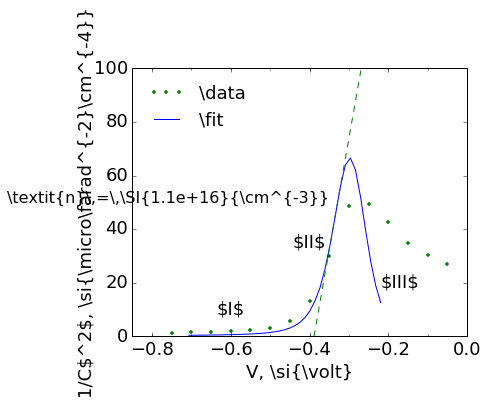

In [77]:
fig = plt.figure()
cv = fig.add_subplot(111)
cv.plot(volt, 1/cap**2, 'g.', label=r'\data')
cv.plot(vv-0.3, 1/cc**2, 'b', label=r'\fit')
cv.plot(volt_fit-0.3, cap_fit, 'g--')

cv.set_xlim(-0.85, 0)
cv.set_xlabel(r'V, \si{\volt}')
cv.set_ylabel(r'1/C\$^2$, \si{\micro\farad^{-2}\cm^{-4}}')

plt.legend(loc='best', frameon=False, numpoints = 3)

cv.text(-0.35, 50, 
        r'\textit{n}\,=\,\SI{'+'{:3.1e}'.format(-doping)+'}{\cm^{-3}}',
        fontsize=16, ha='right')

cv.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
cv.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#plt.tight_layout()
cv.yaxis.set_label_coords(-0.11, 0.5)


cv.text(-0.6, 10, '\$I$', ha="center", va="center")
cv.text(-0.4, 35, '\$II$', ha="center", va="center")
cv.text(-0.17, 20, '\$III$', ha="center", va="center")

name2 = 'IP_InAs_CV_fig2'
plt.savefig(name2+'.svg', transparent=True)

## n-GaAs

In [60]:
# experemental data
cap, volt = ecvproc.cv_read('./data/GaAs_M1500_1-3@0.000.CV', model='Cp')
# linear fitting
cap = cap[:-19]
volt = volt[:-19]

#moving average
n = 3.
w = np.ones(n, dtype=float)
w = w/np.sum(w)

cap2 = np.convolve(cap, w, 'valid')
volt2 = volt[1:-1]

cap_fit, volt_fit, doping = ecvproc.lin_fit(cap2, volt2, 
                                            vmin=1, vmax= 5
                                            )

cap[0] = 1.7*cap[0]
cap[1] = 0.95*cap[1]
cap[2] = 0.95*cap[2]
cap[3] = 0.95*cap[3]

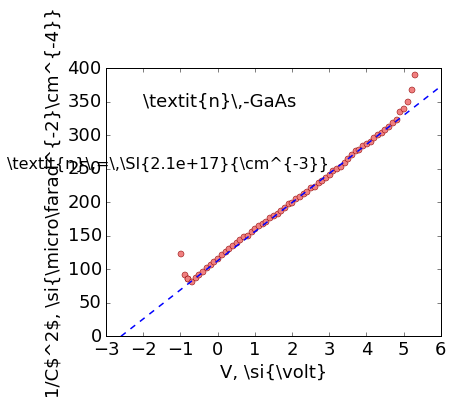

In [61]:
fig = plt.figure()
cv = fig.add_subplot(111)
cv.plot(volt, 1/cap**2, 'ro', mec='darkred', mfc='lightcoral')
cv.plot(volt_fit, cap_fit, 'b--', lw=1.5)
#cv.set_xlim(-1.4, 0)
cv.set_xlabel(r'V, \si{\volt}')
cv.set_ylabel(r'1/C\$^2$, \si{\micro\farad^{-2}\cm^{-4}}')


cv.text(3, 250, 
        r'\textit{n}\,=\,\SI{'+'{:3.1e}'.format(-doping)+'}{\cm^{-3}}',
        fontsize=16, ha='right')
#cv.annotate('(b)', xy=(1, 0), xycoords='axes fraction',fontsize=16,
#            xytext=(-10, 10), textcoords='offset points',
#            ha='right', va='bottom')

#cv.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
#cv.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
#plt.tight_layout()
cv.text(-2, 350, '\\textit{n}\,-GaAs', va='center', ha='left')
cv.set_xlim(-3, 6)
cv.set_ylim(0, 400)

name3 = 'IP_InAs_CV_fig3'
plt.savefig(name3+'.svg', transparent=True)